In [1]:
from modules.general.F_search import *
from modules.graph.hist1D import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import h5py

# use latex for font rendering
# mpl.rcParams['text.usetex'] = True

In [2]:
INPUT = '/home/franky8939/GITHUP/DarkSUSY-master/data/h5_muon_all/DarkSUSY_all_NMuon_USER.h5'
hf = h5py.File(INPUT, 'r')

def find_Mu_Entries(vector, variable="Mu_Entries", file=hf):
    name_local_group = "MNeuL_" + str(vector[0]) + "/MNeuD_" + str(vector[1]) + \
                       "/MPhoD_" + str(vector[2]) + "/TcPhoD_" + str(vector[3]) + \
                       "/" + vector[4]
    # print(name_local_group)
    try:
        output = np.array(file.get(name_local_group + "/" + variable))
    except:
        output = None
    return output

def frec(data, number, porciento=.1, repetir=100):
    output = np.zeros(repetir)
    Nl = len(data)
    for i in range(repetir):
        if porciento <1:
            corte2, corte = train_test_split(data, test_size =porciento, shuffle = True)
        else:
            corte = data
        # print(len(corte), len(corte2))
        output[i] = float(np.sum(corte==number))/len(corte)
    #print(len(corte))
        # print(output[i], corte==number)
    return output

# graficar histograma especifico para este caso
def graficar_HISTG_ENTRIES(ax, vector, color="red"):
    Mu_Entries = find_Mu_Entries(vector, variable="Mu_Entries")

    ax.hist(frec(Mu_Entries, 0, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="0 $\mu$")
    ax.hist(frec(Mu_Entries, 1, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="1 $\mu$")
    ax.hist(frec(Mu_Entries, 2, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="2 $\mu$")
    ax.hist(frec(Mu_Entries, 3, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="3 $\mu$")
    ax.hist(frec(Mu_Entries, 4, .1, repetir=10000),  bins=25,
            alpha=0.7, density=1, label="4 $\mu$")
    ax.axvline(x=frec(Mu_Entries, 0, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 1, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 2, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 3, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    ax.axvline(x=frec(Mu_Entries, 4, 1, repetir=1),
               ymin=0, ymax=50, color=color, linestyle=':')
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=3)
    # ax.set_xlabel(" Porcentaje de Eventos")
    ax.set_ylabel(" Frecuencia Normalizada $f_N$")
    ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
    ax.grid(True)
    return ax

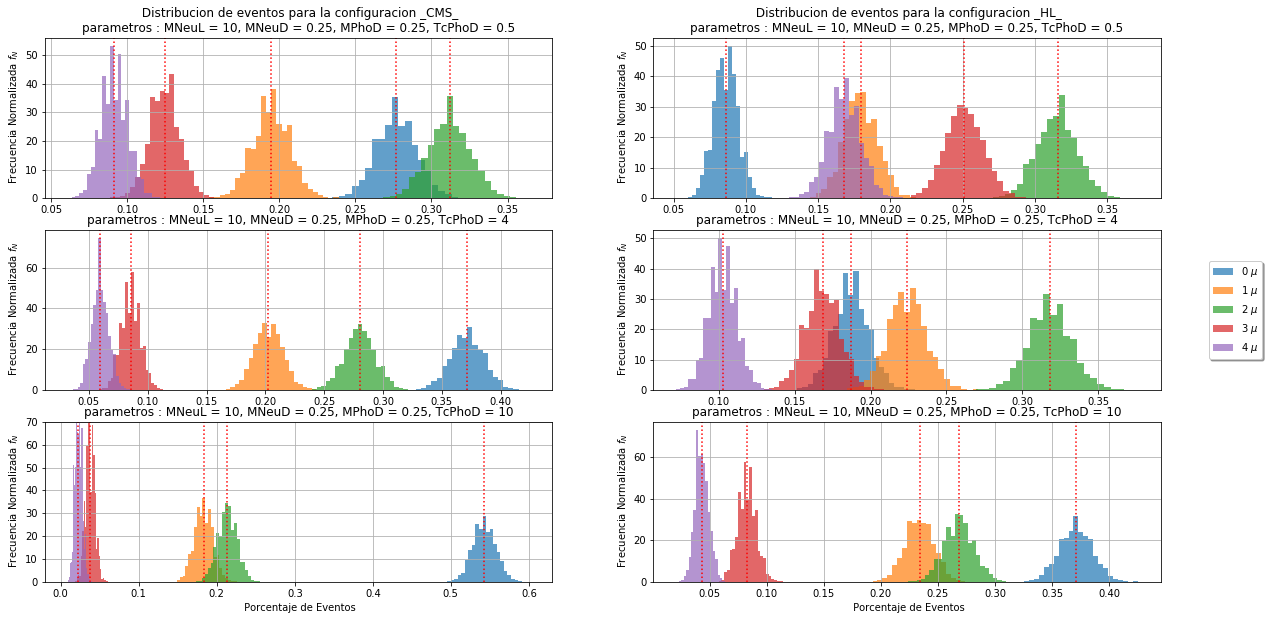

In [7]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

ax = fig.add_subplot(3, 2, 1)
vector = [10, 0.25, 0.25, 0.5, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
              "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
              ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

#title = "Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" + \
#        "parametros : $M_{n_1}$ = " + str(vector[0]) + ", $M_{n_D}$ = " + str(vector[1]) + \
#        ", $M_{\gamma_D}$ = " + str(vector[2]) + ", ${T_c}_{\gamma_D} = " + str(vector[3])

ax = fig.add_subplot(3, 2, 2)
vector = [10, 0.25, 0.25, 0.5, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
              "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
              ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 3)
vector = [10, 0.25, 0.25, 4, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 4)
vector = [10, 0.25, 0.25, 4, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.legend(loc='center right', bbox_to_anchor=(1.21, 0.5), shadow=True, ncol=1)


ax = fig.add_subplot(3, 2, 5)
vector = [10, 0.25, 0.25, 10, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_xlabel(" Porcentaje de Eventos")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.set_ylim(0, 70)

ax = fig.add_subplot(3, 2, 6)
vector = [10, 0.25, 0.25, 10, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_xlabel(" Porcentaje de Eventos")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
fig.savefig("Distribucion_Entries.pdf")
fig.savefig("Distribucion_Entries.png")
plt.show()

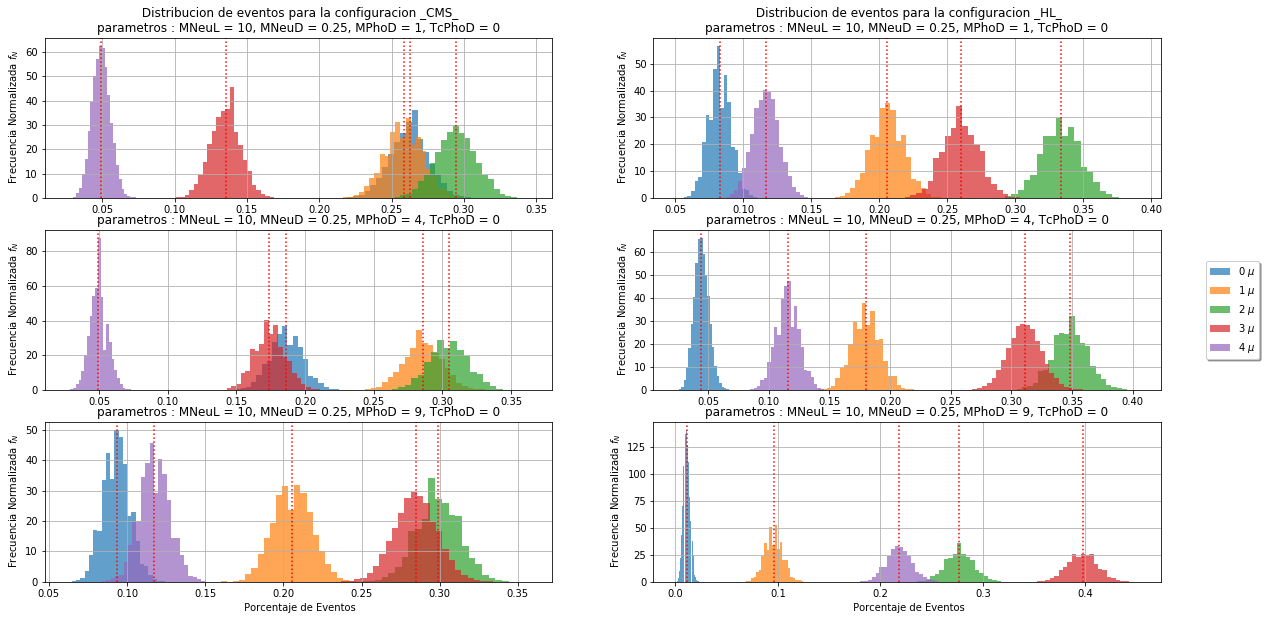

In [14]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

ax = fig.add_subplot(3, 2, 1)
vector = [10, 0.25, 1, 0, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
                 "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 2)
vector = [10, 0.25, 1, 0, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
                 "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 3)
vector = [10, 0.25, 4, 0, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 4)
vector = [10, 0.25, 4, 0, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.legend(loc='center right', bbox_to_anchor=(1.204, 0.5), shadow=True, ncol=1)


ax = fig.add_subplot(3, 2, 5)
vector = [10, 0.25, 9, 0, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_xlabel(" Porcentaje de Eventos")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 6)
vector = [10, 0.25, 9, 0, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_xlabel(" Porcentaje de Eventos")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

fig.savefig("Distribucion_Entries2.pdf")
fig.savefig("Distribucion_Entries2.png")
plt.show()

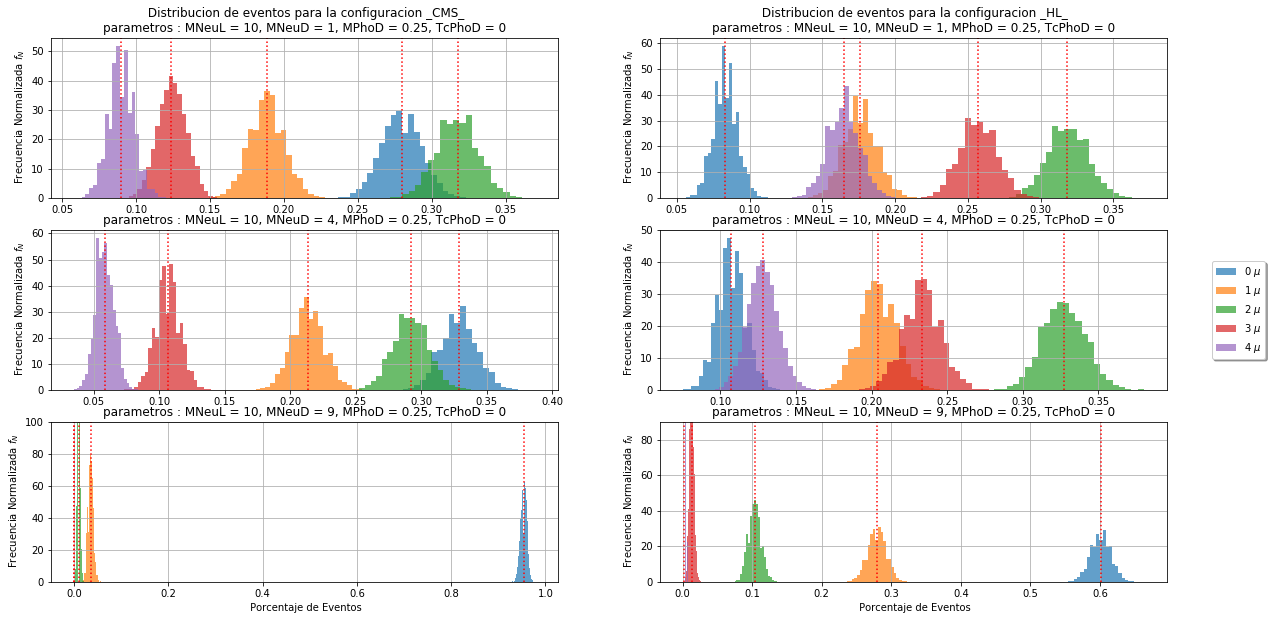

In [16]:
plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

ax = fig.add_subplot(3, 2, 1)
vector = [10, 1, 0.25, 0, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
                 "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 2)
vector = [10, 1, 0.25, 0, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_title(" Distribucion de eventos para la configuracion " + str(vector[4]) + "\n" +
                 "parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 3)
vector = [10, 4, 0.25, 0, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))

ax = fig.add_subplot(3, 2, 4)
vector = [10, 4, 0.25, 0, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.legend(loc='center right', bbox_to_anchor=(1.204, 0.5), shadow=True, ncol=1)

ax = fig.add_subplot(3, 2, 5)
vector = [10, 9, 0.25, 0, "_CMS_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_xlabel(" Porcentaje de Eventos")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.set_ylim(0, 100)

ax = fig.add_subplot(3, 2, 6)
vector = [10, 9, 0.25, 0, "_HL_"]
ax = graficar_HISTG_ENTRIES(ax, vector, color="red")
ax.set_xlabel(" Porcentaje de Eventos")
#ax.set_title("parametros : MNeuL = " + str(vector[0]) + ", MNeuD = " + str(vector[1]) +
#                 ", MPhoD = " + str(vector[2]) + ", TcPhoD = " + str(vector[3]))
ax.set_ylim(0, 90)
fig.savefig("Distribucion_Entries3.pdf")
fig.savefig("Distribucion_Entries3.png")
plt.show()

In [15]:
1+1

2